# NBA Players

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# 1. Loading data set

In [ ]:
df = pd.read_csv("./NBA.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      4000 non-null   int64  
 1   poss        4000 non-null   int64  
 2   mp          4000 non-null   int64  
 3   do_ratio    4000 non-null   float64
 4   pacing      4000 non-null   float64
 5   win_rating  4000 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 187.6 KB


In [5]:
df.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


In [9]:
df.columns

Index(['season', 'poss', 'mp', 'do_ratio', 'pacing', 'win_rating'], dtype='object')

In [25]:
# data types per columns

df.dtypes

season          int64
poss            int64
mp              int64
do_ratio      float64
pacing        float64
win_rating    float64
dtype: object

In [23]:
# number of null and/or missing values per columns

df.isnull().sum()

season        0
poss          0
mp            0
do_ratio      0
pacing        0
win_rating    0
dtype: int64

In [27]:
# Boolean filter to identify null/missing values

df.isnull()

,season,poss,mp,do_ratio,pacing,win_rating
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3995,False,False,False,False,False,False
3996,False,False,False,False,False,False
3997,False,False,False,False,False,False
3998,False,False,False,False,False,False


## \[$\color{blue}{\text{The data set is clean}}$\]

# 2. Selecting Features and Target
## 2.1. Correlation between features

<Axes: xlabel='pacing', ylabel='win_rating'>

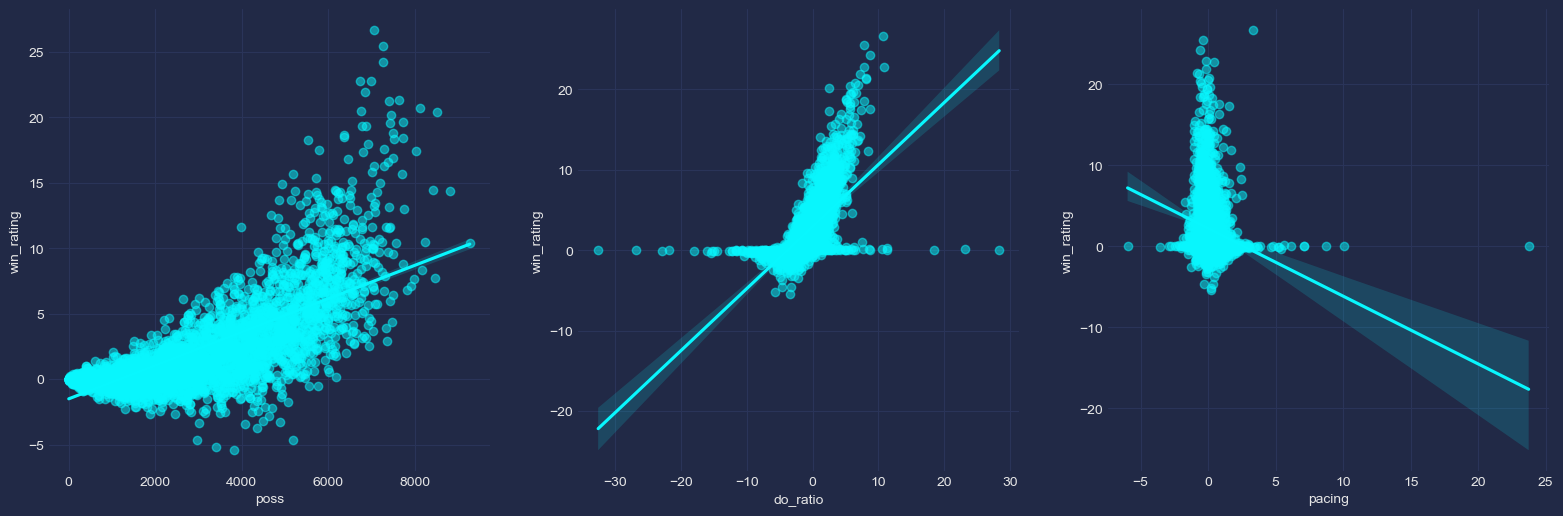

In [126]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

plt.subplots_adjust(left=0.5, right=2)

sns.regplot(data=df, y='win_rating', x='poss', ax=axes[0], scatter_kws={'alpha':0.5})
sns.regplot(data=df, y='win_rating', x='do_ratio', ax=axes[1], scatter_kws={'alpha':0.5})
sns.regplot(data=df, y='win_rating', x='pacing', ax=axes[2], scatter_kws={'alpha':0.5})

<Axes: xlabel='mp', ylabel='win_rating'>

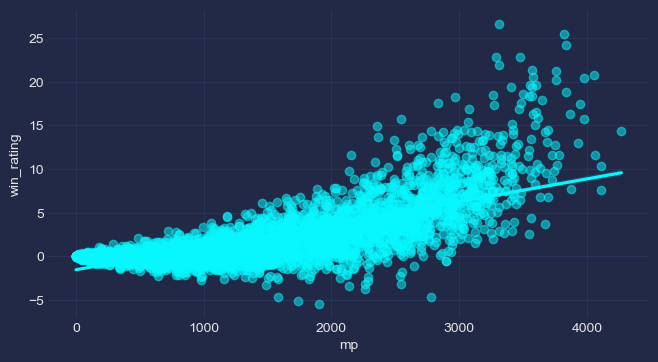

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

plt.subplots_adjust(left=0.5, right=2)

sns.regplot(data=df, y='win_rating', x='mp', scatter_kws={'alpha':0.5})

+ $\color{blue}\text{The winning rate is correlated with possession (poss)}$
+ $\color{blue}\text{The winning rate is correlated with minutes played (mp)}$
+ $\color{blue}\text{We can choose as features = poss and mp target = win\_rate}$
+ $\color{blue}\text{Because other features will have less impacts we take everything}$

In [188]:
y = df["win_rating"] #--> target
X = df.drop("win_rating", axis = 1) #--> features all

# 3. Instantiate model
## 3. 1. Cross-Validation

In [190]:
# Instantiate model
model = LinearRegression()

# Cross validate the model 10 times
cross_val_results = cross_validate(model, X, y, cv = 10) # --> Dictionary
print(cross_val_results)

{'fit_time': array([0.0082202 , 0.00374627, 0.00715017, 0.00401616, 0.00401211,
       0.00477934, 0.00902867, 0.00401092, 0.00401688, 0.00456715]), 'score_time': array([0.00642872, 0.00349188, 0.00559139, 0.00780296, 0.00200438,
       0.00601578, 0.00368285, 0.00200629, 0.00200844, 0.00200605]), 'test_score': array([0.62160332, 0.66841605, 0.61279207, 0.6424707 , 0.60087037,
       0.56622906, 0.64238734, 0.68361254, 0.65020194, 0.64386364])}


Cross Validate:

+ $\color{blue}\text{splits X and y into k folds}$

+ $\color{blue}\text{trains the model k times}$

+ $\color{blue}\text{tests the model k times}$

+ $\color{blue}\text{returns k scores + timing info in a dictionary}$

In [200]:
# Keys in the dictionary
list(cross_val_results.keys())

['fit_time', 'score_time', 'test_score']

In [62]:
# Minumum Score
minimum_score = cross_val_results["test_score"].min()
print(minimum_score)

0.5662290642454504


In [64]:
#Maximum Score
maximum_score = cross_val_results["test_score"].max()
print(maximum_score)

0.6836125367010344


In [66]:
# Mean of scores
mean_score = cross_val_results["test_score"].mean()
print(mean_score)

0.6332447030157896


# 4. Computational time vs K-fold / Score vs K-fold

In [76]:
K = [] # --> Empty list for K-fold

score = [] # --> Empty list of score

total_time = [] # --> Empty list of total times for each Cross Validation

for k in range (5, 51) :  # --> looping over cross validation
    
    cross_validate_results = cross_validate(model, X, y, cv = k)

    summation_ft = sum(cross_validate_results["fit_time"])
    summation_st = sum(cross_validate_results["score_time"])
    total_time.append(summation_ft + summation_st)

    score.append(cross_validate_results["test_score"].mean()) # ---> filling score list

    K.append(k) # ---> filling K-list


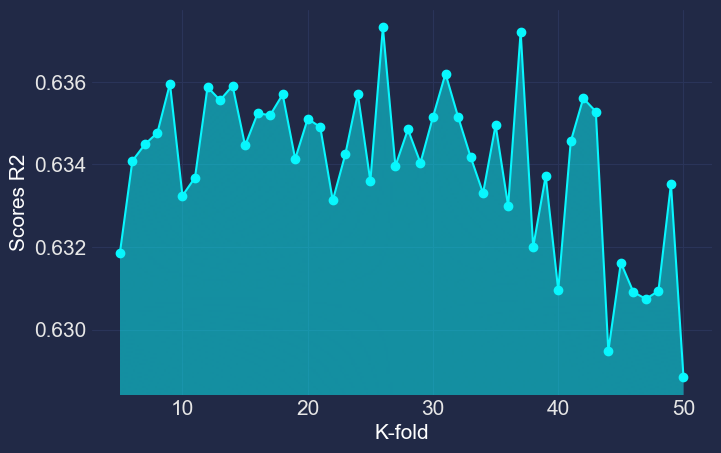

In [88]:
plt.figure(figsize = (8,5))

plt.plot(K, score, marker = 'o')
#plt.plot(x, y2, marker = 'o', c='lime')
plt.xticks(size=15)
plt.yticks(size=15)

plt.xlabel('K-fold', size=15, color='white')
plt.ylabel('Scores R2', size=15, color='white')

plt.show()

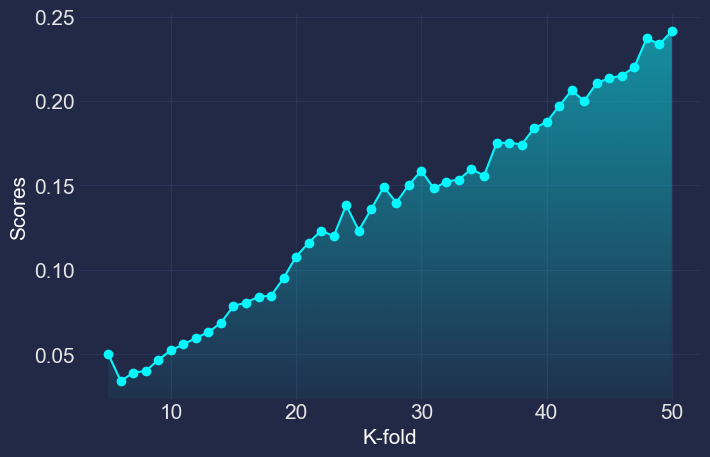

In [86]:
plt.figure(figsize = (8,5))

plt.plot(K, total_time, marker = 'o')
#plt.plot(x, y2, marker = 'o', c='lime')
plt.xticks(size=15)
plt.yticks(size=15)

plt.xlabel('K-fold', size=15, color='white')
plt.ylabel('Scores', size=15, color='white')

plt.show()

# 5. Training the model

In [92]:
# Train the model on the training data
model.fit(X, y)

LinearRegression()

### Model Attributes: slope, intercept

In [98]:
# Visualization of Slope

slope = model.coef_[0]
print(slope)

0.002838196867636507


In [101]:
#  Intercept
intercept = model.intercept_
print(intercept)

-5.850418625449816


# 6. Predict

In [124]:
# Define new player (randomly). This should contain all features excepted target. No need to care about ID
new_player = {"season": 2025, "poss": 6052, "mp": 1000, "do_ratio": 0.34864, "pacing": -0.119765} # --> Dictionary

# Transform new player into data Frame 
new_data_point = pd.DataFrame([new_player]) # --> Data Frame

print(new_data_point)

   season  poss    mp  do_ratio    pacing
0    2025  6052  1000   0.34864 -0.119765


In [122]:
prediction = model.predict(new_data_point)[0]
print(prediction)

0.11865933605334611
